# Using pandas to visualize data

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data/iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# pandas.DataFrame.plot

It is the easiest way to quickly create charts based on a pandas DataFrame.

<AxesSubplot:>

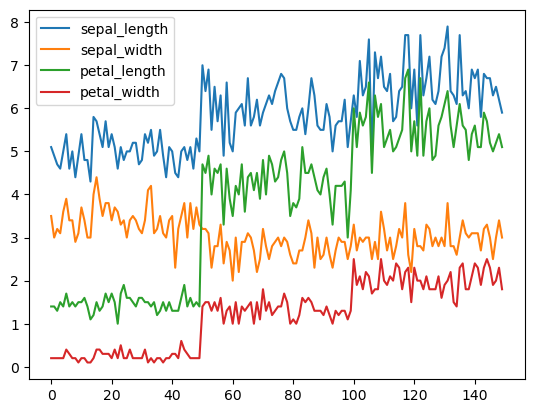

In [5]:
df.plot()

* X-axis of the chart is simply the row index, so it doesn’t essentially show to ‘which class’ a specific data point belongs.
* It contains all the numerical columns of the DataFrame

Selecting the required variables only a plot can be created

<AxesSubplot:>

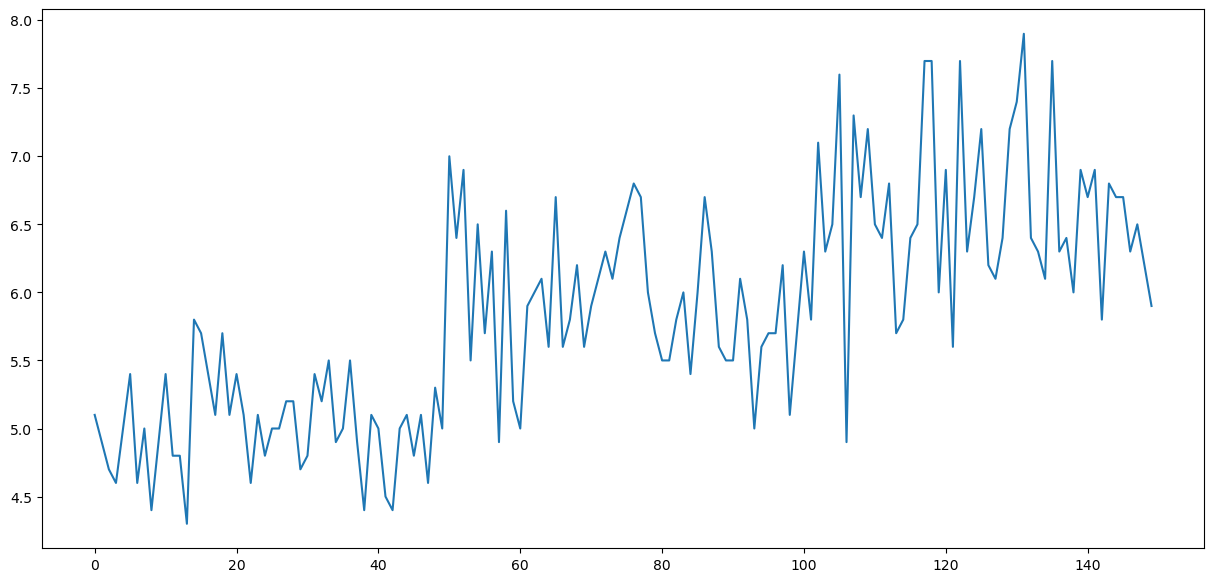

In [6]:
df["sepal_length"].plot(figsize=(15,7))

**you can use .plot() at the top of any data transformation.**

For example, suppose you aggregated the sepal length by class. You can use .plot() method on the top of df.groupby() as below

<AxesSubplot:xlabel='class'>

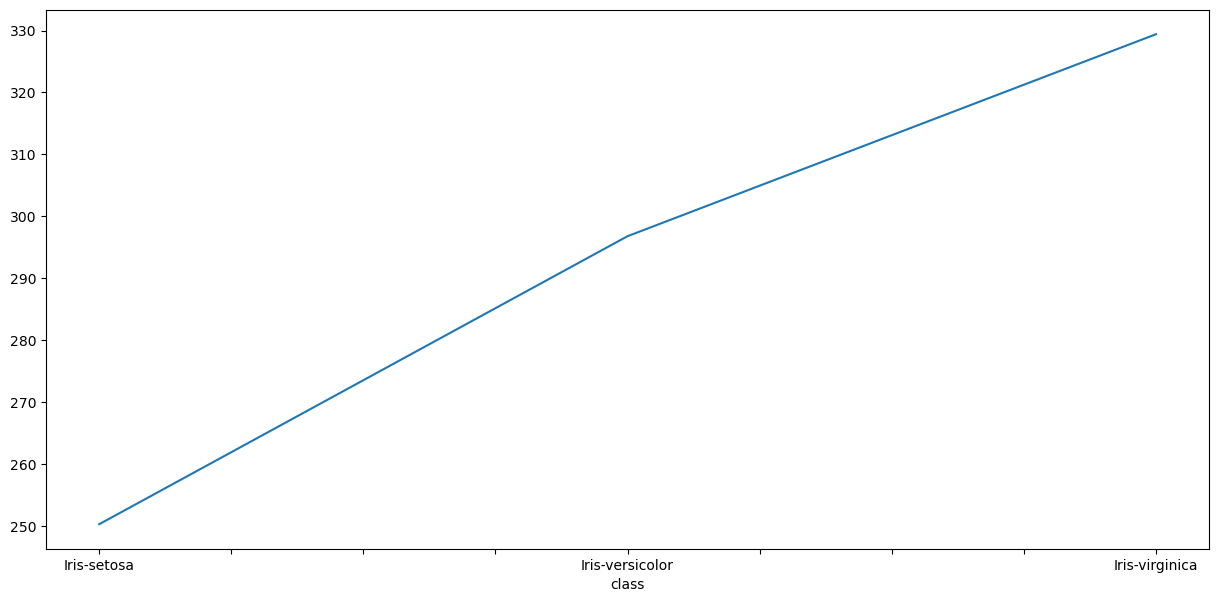

In [7]:
df.groupby("class")["sepal_length"].sum().plot(figsize=(15,7))

There is a problem with the chart, it is containing info but it threats the columns as a numerical column, to compare sepal length for each class of the iris plant, you should better use a bar or a column chart.

You can achieve this using one of the optional parameter of **pandas.DataFrame.plot — kind** — which defines the type of plot to create.
To get the bar chart, you can simply assign the string ‘bar’ to the parameter kind, as shown below.

<AxesSubplot:xlabel='class'>

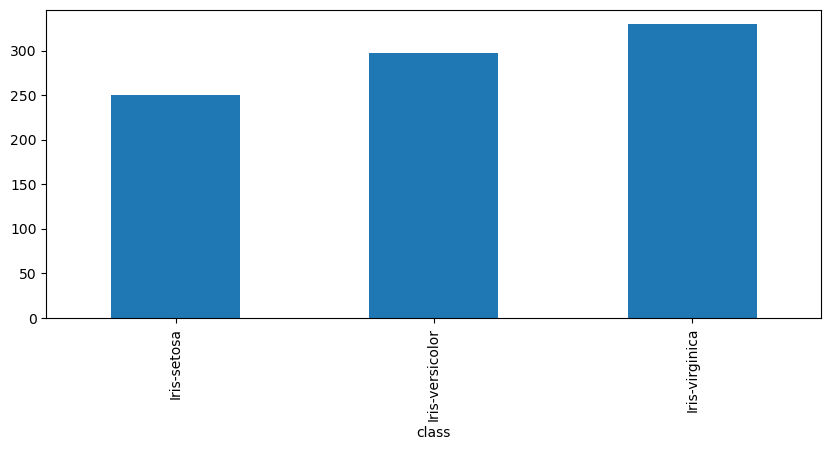

In [9]:
df.groupby("class")["sepal_length"].sum().plot(kind='bar',figsize=(10,4))

to create an horizontal chart assign the string **‘barh’ instead of ‘bar’** to the parameter kind, as shown below.

You can do it to visualize better the names of the column.

<AxesSubplot:ylabel='class'>

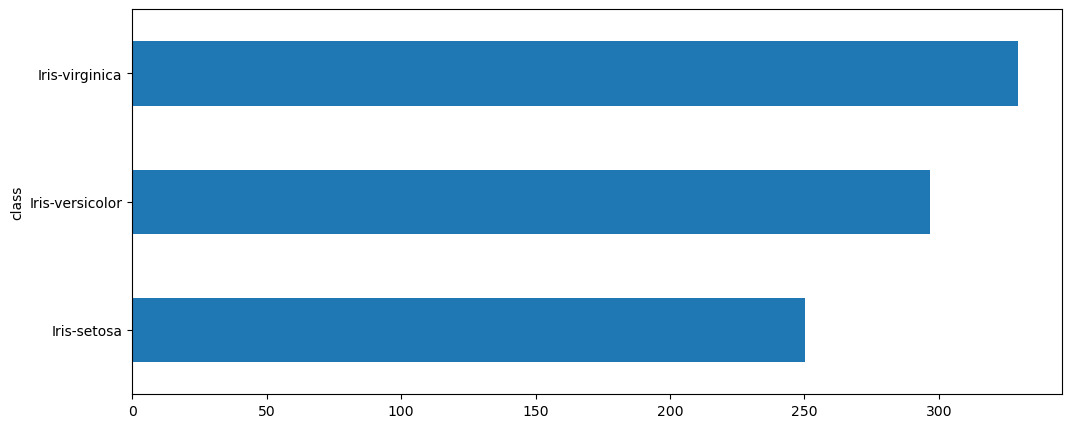

In [11]:
df.groupby("class")["sepal_length"].sum().plot(kind='barh',figsize=(12,5))

depending on the type of graph required you can assign any of the line , bar , barh , hist , box , area , pie and scatter to the parameter kind. You can also refer its documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

you can also visualize the distribution of single variable using **pandas.DataFrame.plot.hist** or passing hist as value for the parameter kind.

<AxesSubplot:ylabel='Frequency'>

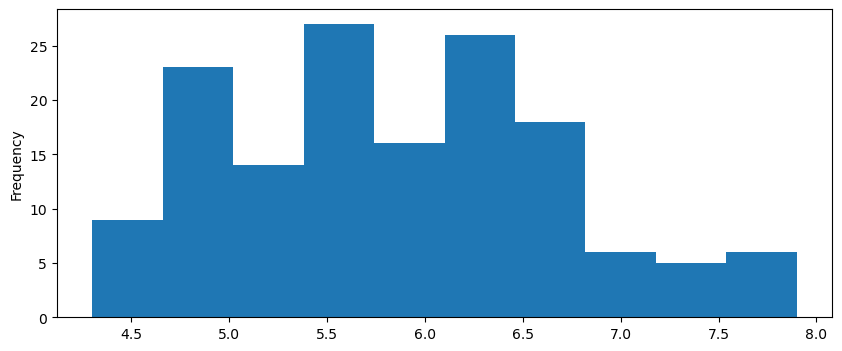

In [15]:
df["sepal_length"].plot.hist(figsize=(10,4))

.hist() creates a histogram which essentially counts the number of times each value appeared in the dataset i.e. its frequency.

# pd.plotting.scatter_matrix()

The function scatter_matrix from pandas plotting quickly creates a matrix of scatter plots. So you can see **relationship of each column with every other column** of the same DataFrame.

The diagonal of this scatter matrix is technically the relationship of a column with itself which indeed represented as a histogram.

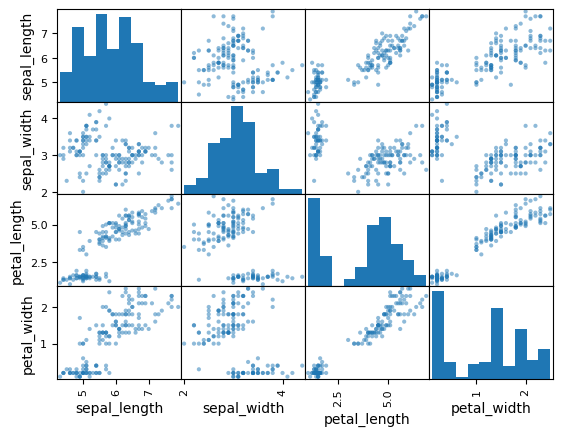

In [18]:
# the ";" ayuda a que se visualize mejor el gráfico
pd.plotting.scatter_matrix(df);

# as a df is pass, you can select the columns that you need to analyze

# pd.pivot_table().plot.barh()

the function **pivot_table()** is used to quickly **summarize the large amount of data** which can help you to understand the trends and comparison between different variables of the DataFrame.

Therefore, pandas.pivot_table() essentially groups the specified columns of the DataFrame together and summarizes the other specified numerical columns as per provided aggregate function.

So, it **helps you to understand trends and patterns** in the data by aggregating it.

In [19]:
bins = [0,5,10]
labels = ["'0-5'","'6-10'"]
df['sepal_length_bucket'] = pd.cut(df['sepal_length'],
                                   bins=bins, labels=labels)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_bucket
0,5.1,3.5,1.4,0.2,Iris-setosa,'6-10'
1,4.9,3.0,1.4,0.2,Iris-setosa,'0-5'
2,4.7,3.2,1.3,0.2,Iris-setosa,'0-5'


suppose you would like to see the variation of the sepal width based on its class and sepal length bucket. You can directly use pivot_table() to get the aggregated data as below.

In [20]:
pd.pivot_table(data=df, index = ["class"],
               columns=["sepal_length_bucket"],
               values=["sepal_width"])

sepal_width          
sepal_length_bucket       '0-5'    '6-10'
class                                    
Iris-setosa            3.185714  3.713636
Iris-versicolor        2.233333  2.804255
Iris-virginica         2.500000  2.983673

Using plot at the end you can see visualy the summary of the group by

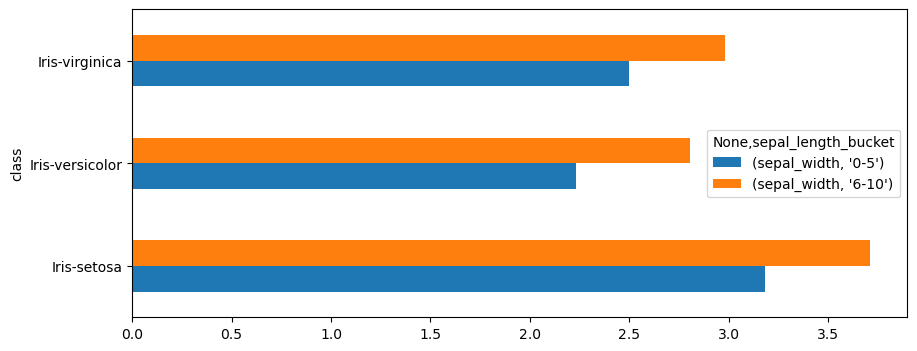

In [22]:
pd.pivot_table(data=df, index = ["class"],
               columns=["sepal_length_bucket"],
               values=["sepal_width"]).plot.barh(figsize=(10,4));